# Random Undersampling

Random undersampling consists in extracting at random samples from the majority class, until they reach a certain proportion compared to the minority class, typically 50:50.

- **Criteria for data exclusion**: Random
- **Final Dataset size**: 2 x minority class

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

## Create data

We will create data where the classes have different degrees of separateness.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [4]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

0    983
1     17
dtype: int64


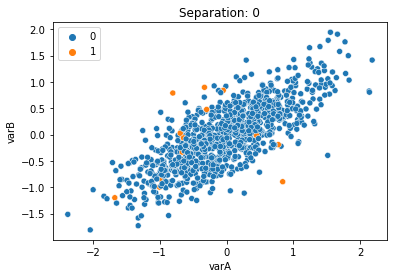

0    983
1     17
dtype: int64


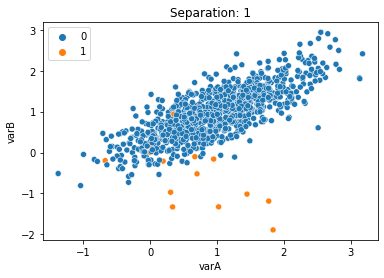

0    983
1     17
dtype: int64


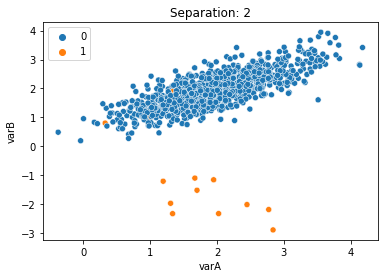

In [5]:
# make datasets with different class separateness
# and plot

for sep in [0, 1, 2]:
    
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )
    
    plt.title('Separation: {}'.format(sep))
    plt.show()

As we increase the parameter **sep**, the minority and majority class show less degree of overlap.

## Random Undersampling

https://imbalanced-learn.org/stable/generated/imblearn.under_sampling.RandomUnderSampler.html

Selects samples from the majority class at random, until we have as many observations as those in the minority class.

In [8]:
# create data

X, y = make_data(sep=2)

# set up the random undersampling class

rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only the majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

In [9]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [15]:
import numpy as np
np.bincount(y)

array([983,  17])

In [16]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((34, 2), (34,))

In [17]:
# number of minority class observations

y.value_counts()

0    983
1     17
dtype: int64

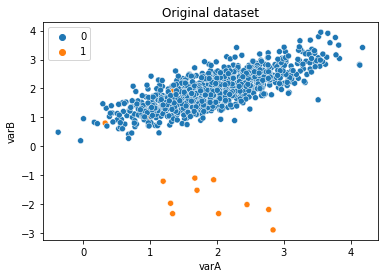

In [18]:
# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

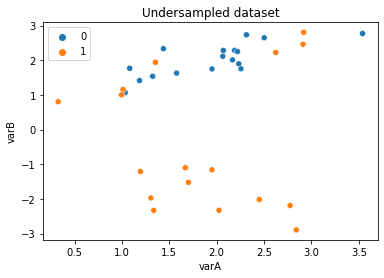

In [19]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

The samples show a similar observation as they do in the original dataset. This is the product of removing data at random.

**HOMEWORK**: 

- change the degree of separateness when creating the data, and re-run the cells above. Then compare the plots.

## Load data

In [20]:
# load data
data = pd.read_csv('../kdd2004.csv')

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [21]:
# size of data
data.shape

(145751, 75)

## Imbalanced target

In [22]:
# imbalanced target
data.target.value_counts() / len(data)

-1    0.991108
 1    0.008892
Name: target, dtype: float64

In [23]:
# imbalanced target
data.target.value_counts()

-1    144455
 1      1296
Name: target, dtype: int64

## Separate train and test

In [24]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [33]:
y_train.value_counts()

-1    101134
 1       891
Name: target, dtype: int64

## Random Undersampling

https://imbalanced-learn.org/stable/generated/imblearn.under_sampling.RandomUnderSampler.html

In [34]:
rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only from majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [35]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((1782, 74), (1782,))

In [36]:
# number of positive class in original dataset
y_train.value_counts()

-1    101134
 1       891
Name: target, dtype: int64

In [37]:
# final data size is 2 times the number of observations
# with positive class:

y_train.value_counts()[1] * 2

1782

## Plot data

Let's compare how the data looks before and after the undersampling.

<AxesSubplot:xlabel='0', ylabel='1'>

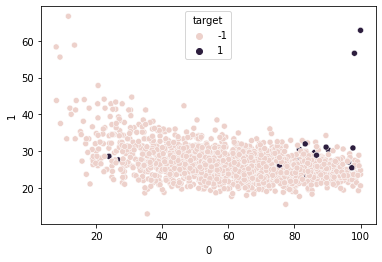

In [38]:
sns.scatterplot(data=data.sample(1784, random_state=0),
                x="0",
                y="1",
                hue="target")

<AxesSubplot:xlabel='0', ylabel='1'>

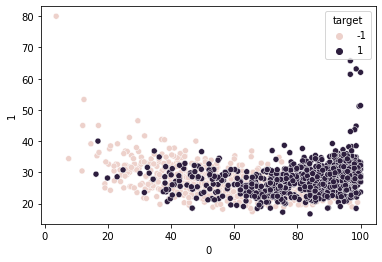

In [39]:
col_names = [str(i) for i in range(74)] +['target']

data_resampled = pd.concat([X_resampled, y_resampled], axis=1)
data_resampled.columns = col_names

sns.scatterplot(data=data_resampled, x="0", y="1", hue="target")

The distributions are similar to that of the original data. The reason you see more purple dots, is because now they are not covered by the pink ones.

<AxesSubplot:xlabel='4', ylabel='5'>

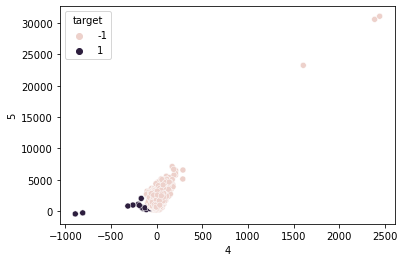

In [40]:
sns.scatterplot(data=data.sample(1784, random_state=0),
                x="4",
                y="5",
                hue="target")

<AxesSubplot:xlabel='4', ylabel='5'>

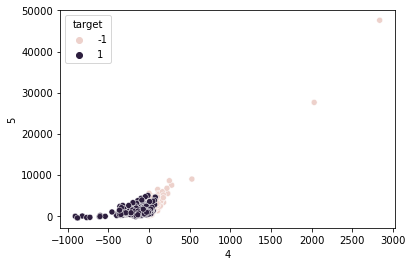

In [41]:
sns.scatterplot(data=data_resampled, x="4", y="5", hue="target")

## Machine learning performance comparison

Let's compare model performance with and without undersampling.

In [42]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [43]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9736769545142595
Test set
Random Forests roc-auc: 0.9724711107235364


In [44]:
# evaluate performance of algorithm built
# using undersampled dataset

run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.9937622893103626
Test set
Random Forests roc-auc: 0.9876831611048272


There is a big jump in model performance.

**HOMEWORK**

- Try random undersampling with and without replacement, and with different machine learning models.